<a href="https://colab.research.google.com/github/ShubhamShaswat/TCS-Humain/blob/master/age_gender_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install face-recognition
!pip install py-agender

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from tqdm import tqdm
import cv2
import PIL
import requests

import face_recognition
import json
from google.colab.patches import cv2_imshow



In [4]:
#import required library
from pyagender import PyAgender




Using TensorFlow backend.


In [18]:
files.upload()

Saving 176.jpg to 176.jpg


{'176.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00d\x00d\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xee\x00&Adobe\x00d\xc0\x00\x00\x00\x01\x03\x00\x15\x04\x03\x06\n\r\x00\x00\xcd\'\x00\x00\xfa\x9c\x00\x01\x99M\x00\x02\x99\xa4\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n\x0b\n\n\x0c\x10\x0c\x0c\x0c\x0c\x0c\x0c\x10\x0c\x0e\x0f\x10\x0f\x0e\x0c\x13\x13\x14\x14\x13\x13\x1c\x1b\x1b\x1b\x1c\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x01\x07\x07\x07\r\x0c\r\x18\x10\x10\x18\x1a\x15\x11\x15\x1a\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\x1f\xff\xc2\x00\x11\x08\x03\x00\x04\x00\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\xf0\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x02\x03\x05\x06\x07\x01\x00\x03\x01\x01\x01

In [0]:
MY_IMAGE='176.jpg'

In [0]:
#return age and gender
def age_gender():

  ages=[]
  genders=[]
  for face in faces:
    if face['gender'] > 0.5:
      genders.append('F')
    else:
      genders.append('M')

    ages.append(int(face['age']) ) 
    
    
  return genders,ages    

In [0]:
def show_image(MY_IMAGE,genders,ages):
  
  image = cv2.imread(MY_IMAGE)
  face_locations = face_recognition.face_locations(image)

  for (top, right, bottom, left),gender,age in zip(face_locations,genders,ages):
  
  
    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, gender, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 2)
    
    cv2.putText(image, str(age), (left-20 , bottom+20 ), font, 1.0, (255, 255, 255), 2)
    
 
  imS=cv2.resize(image,(0,0),fx=0.5,fy=0.5)  
  cv2_imshow(imS)

  return

In [0]:
#detect faces and estimate ages and genders
img=cv2.imread(MY_IMAGE)
faces =  PyAgender().detect_genders_ages(img)

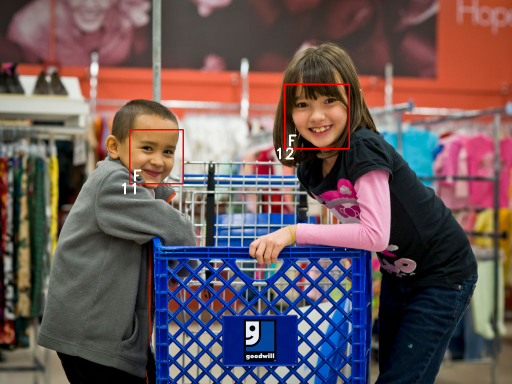

In [21]:
#call all the fucntions

genders,ages=age_gender()
show_image(MY_IMAGE,genders,ages)